# 시계열 데이터 분석 - 주가 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import yfinance as yfin
from pandas_datareader import data
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
yfin.pdr_override() 

# 분석할 기간
end = datetime.now() # 현재 시간
start = datetime(end.year-1, end.month, end.day)

df = data.get_data_yahoo('005930.KS', start=start, end=end)
df.head()
# df.tail() # 가장 하위의 데이터 표시

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-17,65000.0,65600.0,64700.0,65300.0,64333.132812,13486618
2023-04-18,65900.0,66000.0,64800.0,65600.0,64628.687500,14802060
2023-04-19,65500.0,65800.0,65300.0,65500.0,64530.167969,10255985
2023-04-20,65100.0,65300.0,64600.0,65300.0,64333.132812,9501169
2023-04-21,65800.0,65900.0,65400.0,65700.0,64727.210938,10538622


In [3]:
ticker = {'SAMSUNG':'005930.KS', 'NAVER': '035420.KS', 'KAKAO':'035720.KS'}

# 분석할 기간
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# 주가 데이터 가져오기
df_S = data.get_data_yahoo(ticker['SAMSUNG'], start=start, end=end)
df_N = data.get_data_yahoo(ticker['NAVER'], start=start, end=end)
df_K = data.get_data_yahoo(ticker['KAKAO'], start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
print('삼성전자')
df_S.info()
print('네이버')
df_N.info()
print('카카오')
df_K.info()

삼성전자
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2023-04-17 to 2024-04-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj Close  244 non-null    float64
 5   Volume     244 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB
네이버
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2023-04-17 to 2024-04-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj Close  244 non-null    float64
 5   Volume     244 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB
카카오

In [6]:
df_S

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-17,65000.0,65600.0,64700.0,65300.0,64333.132812,13486618
2023-04-18,65900.0,66000.0,64800.0,65600.0,64628.687500,14802060
2023-04-19,65500.0,65800.0,65300.0,65500.0,64530.171875,10255985
2023-04-20,65100.0,65300.0,64600.0,65300.0,64333.132812,9501169
2023-04-21,65800.0,65900.0,65400.0,65700.0,64727.210938,10538622
...,...,...,...,...,...,...
2024-04-08,85200.0,86000.0,84500.0,84500.0,84500.000000,18953232
2024-04-09,84500.0,84900.0,83100.0,83600.0,83600.000000,23725956
2024-04-11,83200.0,84700.0,82500.0,84100.0,84100.000000,25538009


In [7]:
# Year, Month, Day 컬럼
df_S['Year'] = [d.year for d in df_S.index]
df_S['Month'] = [d.month for d in df_S.index]
df_S['Day'] = [d.day for d in df_S.index]

df_N['Year'] = [d.year for d in df_N.index]
df_N['Month'] = [d.month for d in df_N.index]
df_N['Day'] = [d.day for d in df_N.index]

df_K['Year'] = [d.year for d in df_K.index]
df_K['Month'] = [d.month for d in df_K.index]
df_K['Day'] = [d.day for d in df_K.index]

In [8]:
df_K.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
2024-04-08,48850.0,49750.0,48300.0,49150.0,49150.0,1006988,2024,4,8
2024-04-09,49100.0,50100.0,48850.0,49250.0,49250.0,775713,2024,4,9
2024-04-11,48450.0,48800.0,47700.0,48050.0,48050.0,2005085,2024,4,11
2024-04-12,48050.0,48450.0,47650.0,47850.0,47850.0,946914,2024,4,12
2024-04-15,47100.0,47400.0,46850.0,47350.0,47350.0,208052,2024,4,15


In [9]:
df_S['diff Close'] = df_S['Close'] - df_S['Adj Close']
df_S.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,diff Close
Date,,,,,,,,,,
2024-04-08,85200.0,86000.0,84500.0,84500.0,84500.0,18953232,2024,4,8,0.0
2024-04-09,84500.0,84900.0,83100.0,83600.0,83600.0,23725956,2024,4,9,0.0
2024-04-11,83200.0,84700.0,82500.0,84100.0,84100.0,25538009,2024,4,11,0.0
2024-04-12,84700.0,84900.0,83200.0,83700.0,83700.0,17061770,2024,4,12,0.0
2024-04-15,82900.0,83200.0,82200.0,82600.0,82600.0,6271561,2024,4,15,0.0


In [9]:
df_N['diff Close'] = df_N['Close'] - df_N['Adj Close']
df_N.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,diff Close
Date,,,,,,,,,,
2024-04-08,193100.0,193200.0,188500.0,189900.0,189900.0,614052,2024,4,8,0.0
2024-04-09,189100.0,190500.0,186600.0,189000.0,189000.0,457312,2024,4,9,0.0
2024-04-11,186100.0,188300.0,183100.0,183600.0,183600.0,1192681,2024,4,11,0.0
2024-04-12,184700.0,189300.0,184600.0,185900.0,185900.0,835729,2024,4,12,0.0
2024-04-15,183800.0,184400.0,182700.0,183800.0,183800.0,131218,2024,4,15,0.0


In [11]:
df_K['diff Close'] = df_K['Close'] - df_K['Adj Close']
df_K.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,diff Close
Date,,,,,,,,,,
2024-04-08,48850.0,49750.0,48300.0,49150.0,49150.0,1006988,2024,4,8,0.0
2024-04-09,49100.0,50100.0,48850.0,49250.0,49250.0,775713,2024,4,9,0.0
2024-04-11,48450.0,48800.0,47700.0,48050.0,48050.0,2005085,2024,4,11,0.0
2024-04-12,48050.0,48450.0,47650.0,47850.0,47850.0,946914,2024,4,12,0.0
2024-04-15,47100.0,47400.0,46850.0,47150.0,47150.0,184111,2024,4,15,0.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... Sorry~~~')

### 종가, 조정된 종가를 차트에 그리기

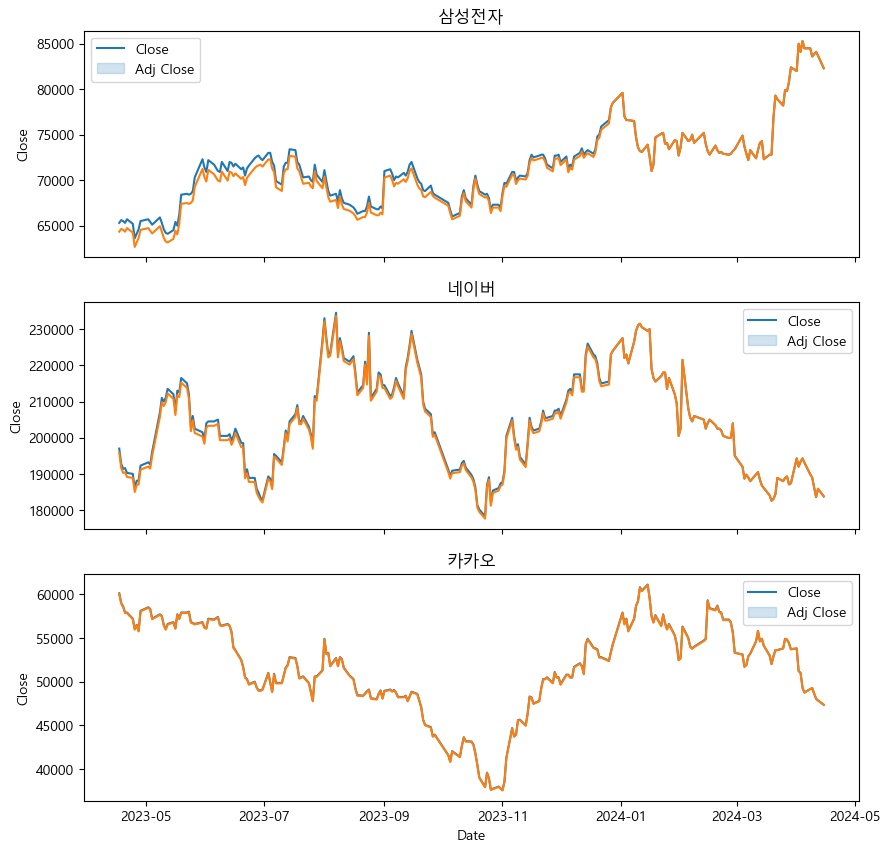

In [11]:
# subplots - 여러 개의 그래프를 그리는 함수. x축 공유(shareX 속성), nrows : 차트의 갯수
fig, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, figsize=(10,10), sharex=True)
# 삼성전자 그래프
sns.lineplot(data=df_S, x='Date', y='Close', ax=ax1)
sns.lineplot(data=df_S, x='Date', y='Adj Close', ax=ax1)
# 네이버 그래프
sns.lineplot(data=df_N, x='Date', y='Close', ax=ax2)
sns.lineplot(data=df_N, x='Date', y='Adj Close', ax=ax2)
# 카카오 그래프
sns.lineplot(data=df_K, x='Date', y='Close', ax=ax3)
sns.lineplot(data=df_K, x='Date', y='Adj Close', ax=ax3)

ax1.set_title("삼성전자")
ax1.legend(['Close', 'Adj Close'])

ax2.set_title("네이버")
ax2.legend(['Close', 'Adj Close'])

ax3.set_title("카카오")
ax3.legend(['Close', 'Adj Close'])

### 종가 그래프 그리기

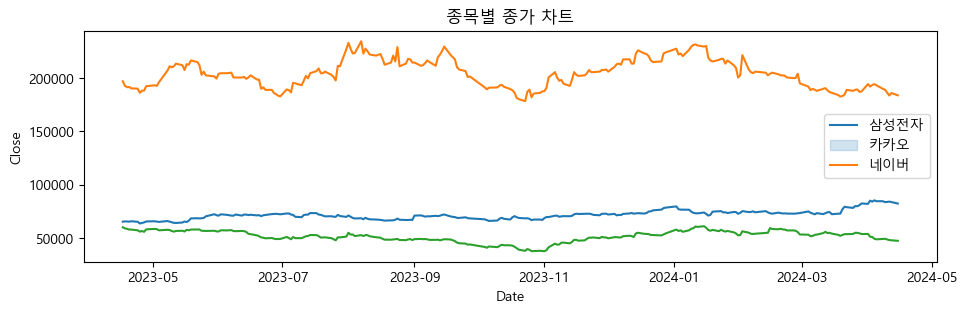

In [13]:
fig, ax = plt.subplots(figsize = (11,3))
sns.lineplot(data = df_S, x='Date', y='Close')
sns.lineplot(data = df_N, x='Date', y='Close')
sns.lineplot(data = df_K, x='Date', y='Close')
ax.legend(['삼성전자','카카오','네이버'])
ax.set_title('종목별 종가 차트')
plt.show()

### 거래량 차트 그리기

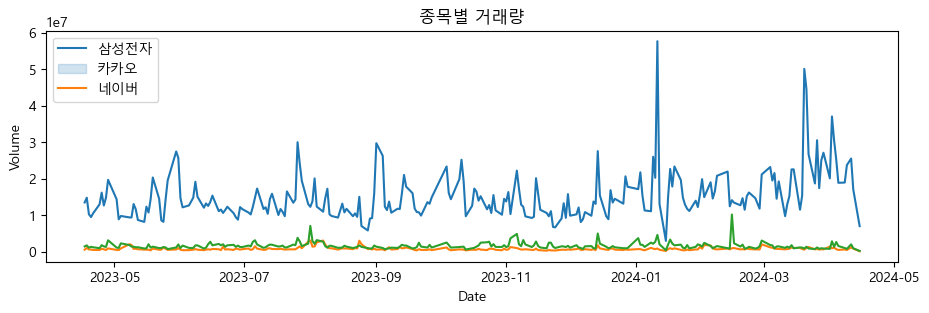

In [15]:
fig, ax = plt.subplots(figsize = (11,3))
sns.lineplot(data = df_S, x='Date', y='Volume')
sns.lineplot(data = df_N, x='Date', y='Volume')
sns.lineplot(data = df_K, x='Date', y='Volume')
ax.legend(['삼성전자','카카오','네이버'])
ax.set_title('종목별 거래량')
plt.show()

### 시가총액 차트

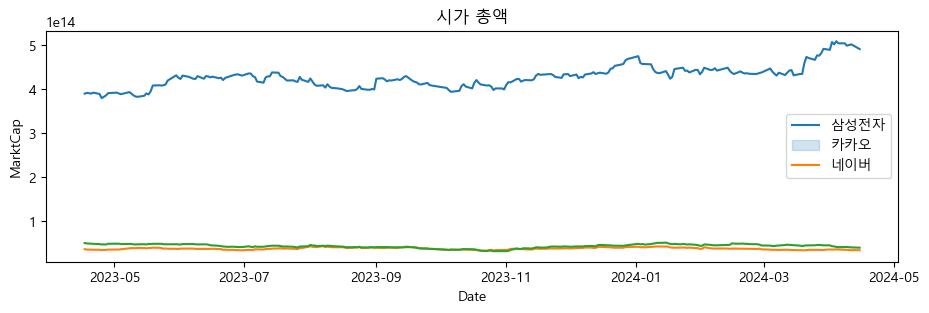

In [19]:
df_S['MarktCap'] = df_S['Close'] * 5969782550
df_N['MarktCap'] = df_N['Close'] * 181796874
df_K['MarktCap'] = df_K['Close'] *  829823729

fig, ax = plt.subplots(figsize = (11,3))
sns.lineplot(data = df_S, x='Date', y='MarktCap')
sns.lineplot(data = df_N, x='Date', y='MarktCap')
sns.lineplot(data = df_K, x='Date', y='MarktCap')
ax.legend(['삼성전자','카카오','네이버'])
ax.set_title('시가 총액')
plt.show()

### 년간 추이

In [17]:
# index의 date 컬럼을 년-월 형식으로 변환하는 함수
def concatenate_year_month(date):
    return "{}-{}".format(date.year, date.month) # 204-04-15 => 2024-04변환
   

In [18]:
df_S['Year-Month'] = list(concatenate_year_month(x) for x in df_S.index)
df_N['Year-Month'] = list(concatenate_year_month(x) for x in df_S.index)
df_K['Year-Month'] = list(concatenate_year_month(x) for x in df_S.index)


Text(0.5, 1.0, '월별 주가 추이')

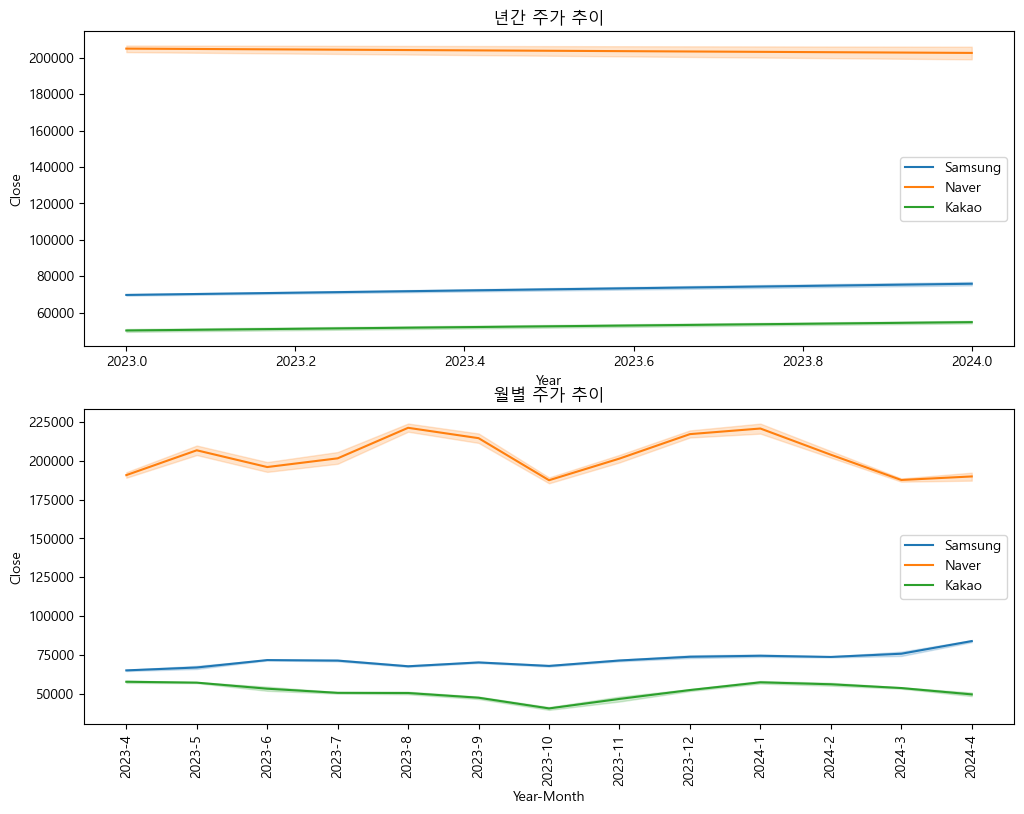

In [20]:
fig, ax = plt.subplots(nrows=2, figsize=(12,9))
plt.xticks(rotation=90) # x축으 ㅣ레이블을 90도로 전환하여 출력
sns.lineplot(data=df_S, x = 'Year', y='Close', label='Samsung', ax=ax[0])
sns.lineplot(data=df_N, x = 'Year', y='Close', label='Naver', ax=ax[0])
sns.lineplot(data=df_K, x = 'Year', y='Close', label='Kakao', ax=ax[0])

sns.lineplot(data=df_S, x = 'Year-Month', y='Close', label='Samsung', ax=ax[1])
sns.lineplot(data=df_N, x = 'Year-Month', y='Close', label='Naver', ax=ax[1])
sns.lineplot(data=df_K, x = 'Year-Month', y='Close', label='Kakao', ax=ax[1])

ax[0].set_title('년간 주가 추이')
ax[1].set_title('월별 주가 추이')